# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [71]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [72]:
print(df.head())


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [73]:
print(df.iloc[0])

Sepal.Length       5.1
Sepal.Width        3.5
Petal.Length       1.4
Petal.Width        0.2
Species         setosa
Name: 0, dtype: object


In [74]:
print(df.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


In [88]:
num_rows = df.shape[0] # number of rows
print(num_rows)

150


In [89]:
print(df.shape) # returns a tuple, first element is number of rows and the second is number of columns

(150, 5)


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [94]:
# Your code here
def alpha_func(D,idx):
    alpha_values = []
    for i in idx:
        sepal_width = D.loc[i, 'Sepal.Width'] # Access Sepal width for the given index
        sepal_length = D.loc[i, 'Sepal.Length'] # Access Sepal length for the given index
        alpha = sepal_width / sepal_length
        alpha_values.append (alpha)
    return alpha


Test the code below

In [95]:
alpha_func(df, range(100))

0.49122807017543857

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [84]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.45

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  
answer: Calculating the mean of Sepal.Length provides us a single estimate of the average sepal length, and this single estimate may not account for the variability in samples and accurately reflect the true population mean.
Bootstrapping addresses this issue, it generates multiple resampled datasets, and allows us to estimate the standard error of the mean and derive confidence intervals. This approach provides a more comprehensive understanding of uncertainty and variability in our sample estimates, and improves the robustness of our statistical conclusions.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [78]:
# Add your code here to set the seed
np.random.seed(42)


In [79]:
# (iv) Defining boot_SE() Function
def boot_SE(df, alpha_func, num_boots = 1000):
    # data: The original dataset from which bootstrap samples will be drawn
    # alpha_func: The function to compute the statistic of interest
    # num_boots: Number of bootstrap samples to generate (default = 1000)
    # se: Bootstrap standard error of the statistic
    n = len(df) # n represents the number of observations in the dataset
    bootstrap_samples = []
    boots = np.zeros(num_boots)
    for i in range(num_boots):
        # Generate bootstrap sample
        bootstrap_sample = np.random.choice(df.index, size=n, replace=True)
        # Compute statistic of interest (alpha)
        statistic = alpha_func(df, bootstrap_sample)
        bootstrap_samples.append(statistic)
    return bootstrap_samples


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [96]:
bootstrap_samples = boot_SE(df, alpha_func, num_boots=1000)

# Evaluate the accuracy of the alpha estimate
alpha_mean = np.mean(bootstrap_samples)
alpha_std = np.std(bootstrap_samples)
alpha_ci = np.percentile(bootstrap_samples, [2.5, 97.5])

print(f"Mean of Alpha Estimate: {alpha_mean}")
print(f"Standard Deviation of Alpha Estimate: {alpha_std}")
print(f"95% Confidence Interval for Alpha Estimate: {alpha_ci}")

Mean of Alpha Estimate: 0.5315052583123934
Standard Deviation of Alpha Estimate: 0.11653560945154973
95% Confidence Interval for Alpha Estimate: [0.36666667 0.74509804]


_(vi)_ What is the original mean value of `Sepal.Length`?
answer: It is 5.843333333333334 (code below)

Next, let's create a new bootstrapping to bootstrap samples (boot_se_samples) of Sepal.Length, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.  Then, review the bootstrapped range, by using t_range = np.ptp(boot_se_samples).

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [58]:
# Add your code here
original_mean = df['Sepal.Length'].mean()
print(original_mean)

5.843333333333334


In [99]:
# (vii) & (viii)
def bootstrap_mean_std(data, num_boots=1000):
    n = len(data)
    boots_means = np.zeros(num_boots)
    boots_stds = np.zeros(num_boots)
    
    for i in range(num_boots):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        boots_means[i] = np.mean(bootstrap_sample)
        boots_stds[i] = np.std(bootstrap_sample)
    
    return boots_means, boots_stds

# Perform bootstrapping on Sepal.Length column
np.random.seed(42)
boot_means, boot_stds = bootstrap_mean_std(df['Sepal.Length'])

# Calculate original mean and standard deviation
original_mean = df['Sepal.Length'].mean()
original_std = df['Sepal.Length'].std()

# Calculate 95% confidence intervals using np.percentile
conf_interval_mean = np.percentile(boot_means, [2.5, 97.5])
conf_interval_std = np.percentile(boot_stds, [2.5, 97.5])



# Print results
print(f"Original Mean of Sepal.Length: {original_mean}")
print(f"Bootstrapped Mean: {np.mean(boot_means)}")
print(f"95% Confidence Interval for Mean: {conf_interval_mean}")
print(f"Original Standard Deviation of Sepal.Length: {original_std}")
print(f"Bootstrapped Standard Deviation: {np.mean(boot_stds)}")
print(f"95% Confidence Interval for Standard Deviation: {conf_interval_std}")



Original Mean of Sepal.Length: 5.843333333333334
Bootstrapped Mean: 5.844700666666666
95% Confidence Interval for Mean: [5.71063333 5.97268333]
Original Standard Deviation of Sepal.Length: 0.828066127977863
Bootstrapped Standard Deviation: 0.8203346481060249
95% Confidence Interval for Standard Deviation: [0.74560408 0.90169365]


The output '[5.71063333 5.97268333]' means that we are 95% confident that the true population mean Sepal Length falls within this interval.

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

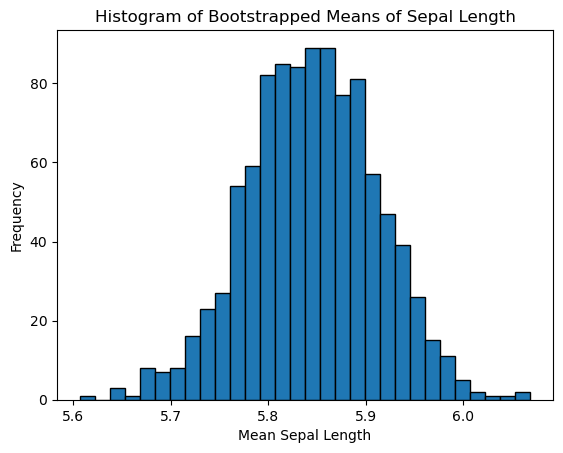

In [100]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_means, bins=30, edgecolor='black')

# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Means of Sepal Length')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Mean Sepal Length')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

I would recommend informing the shipping company that the estimated average sepal length of iris flowers, based on our analysis, falls within the range of 5.71063333 and 5.97268333. This range provides a more comprehensive understanding compared to just presenting a single point estimate, and it incorporates the variability and uncertainty inherent in the dataset.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
